# Capstone Project - Business Recommendation System
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find the business opportunities in different area is **Islamabad Pakistan** .
Since there are many businesses already running in different areas, we will try to get the list of businesses that anyone can start in any new area. 
*For example* There is any area where there is no **Gym** , so we can recommend about *Gym*. We are getting Information about recommended businesses from other similar areas because new businesses should be similar to surrounding businesses. We can not start all businesses in all areas.

We can not only recommend busineses, but we can also see what type of businesses are lack it different areas.

## Data <a name="data"></a>

According to pour problem, we have decided to get following data:
* All the current venues around the central location. It will includes all 
* Most popular businesses around the central location.
* Rating and users interest/Like in all venues

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim 
import folium

In [3]:
CLIENT_ID = 'DALRYGD3YYDWGCNBT5SV2T2GAWAH4QOAJQIZ4NXAXH12KVEI' 
CLIENT_SECRET = '34ZVMV0NBGOL2NE1LHVJXQB3O5U3R34SYQZ3PKZ5L1QT5XWP' 
VERSION = '20180605' 
LIMIT = 50

print('credentails!')

credentails!


### Build the different functions for FourSqaure API to get information about Venues.

In [4]:
def getVenueSearch(location_name,latitude,longitude,LIMIT=10):
    venues_list=[]
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            latitude, longitude, LIMIT)
            
    results = requests.get(url).json()["response"]['venues']
        
    venues_list.append([(
        v['id'], v['name'], 
        v['location']['distance'],
        v['location']['lat'], 
        v['location']['lng'], 
        v['categories'][0]['name'] if len(v['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                        "venue_latitude", "venue_longitude", "category"]
    return venue_df

In [5]:
def getVenueRecommendations(location_name,latitude,longitude,OFFSET=1,LIMIT=10):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&offset={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            latitude, longitude, OFFSET)
    
    print(url)
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    venues_list.append([(
        v['venue']['id'], 
        v['venue']['name'], 
        v['venue']['location']['distance'],
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name'] if len(v['venue']['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                        "venue_latitude", "venue_longitude", "category"]
    return venue_df

In [6]:
def getVenueRating(venue_id):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
            
    json = requests.get(url).json()
    
    venue = json["response"]['venue']
    
    return venue['rating'] if not(venue.get('rating') is None) else -1  , venue['likes']['count']

In [7]:
def getVenueTrending(location_name,latitude,longitude,LIMIT=10):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/trending?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION,
            latitude, longitude, LIMIT)
    json = requests.get(url).json()    
    #print(json)    
    results = json["response"]['venues']
        
    venues_list.append([(
        v['id'],
        v['name'], 
        v['location']['distance'],
        v['location']['lat'], 
        v['location']['lng'],
        v['categories'][0]['name'] if len(v['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    if(len(venue_df.columns) > 1):
        venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                            "venue_latitude", "venue_longitude", "category"]
    return venue_df

In [8]:
address = 'Chandni Chowk Rawalpindi' # latitude = 33.6058  longitude = 73.0437 (For other testing....)
address = 'PWD Islamabad'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

print(location)
location_name = address
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} City are {}, {}.'.format(address,latitude, longitude))

PWD Housing Society, وفاقی دارالحکومت اسلام آباد, 45710, پاکستان
The geograpical coordinate of PWD Islamabad City are 33.57127905, 73.14479842931306.


In [9]:
location_name, latitude, longitude = "PWD Islamabad", 33.57528, 73.13797

### Getting Venues around seletced central values.

In [10]:
recommendated_venues = getVenueRecommendations(location_name, latitude, longitude, LIMIT)
search_venues = getVenueSearch(location_name, latitude, longitude, LIMIT)

https://api.foursquare.com/v2/venues/explore?&client_id=DALRYGD3YYDWGCNBT5SV2T2GAWAH4QOAJQIZ4NXAXH12KVEI&client_secret=34ZVMV0NBGOL2NE1LHVJXQB3O5U3R34SYQZ3PKZ5L1QT5XWP&v=20180605&ll=33.57528,73.13797&offset=50


In [13]:
trending_venues = getVenueTrending(location_name, latitude, longitude, LIMIT=50)

### Merging all venues together.

In [14]:
df = pd.concat([recommendated_venues,search_venues])

### Adding **Rating** and **Likes*** by 

In [26]:
import math
count =0 
for index, row in df.iterrows():
    if(math.isnan(row['venue_rate'])):
        print(row['venue_id'], row['venue_name'])
        df.at[index,'venue_rate'], df.at[index,'venue_likes'] = getVenueRating(row['venue_id'])
    count +=1
    if(count ==100): 
        break
df

508aaeb4e4b0ddcb6d8cb3fe KC Grill
510ea3b4e4b0eaed21d499ea OPTP Bahria Town
4f411c5de4b0f7b459cb01de Peppercorn Grill
53e783b4498e3e1c6aeff5a8 Rasheed Sweets
507975d2e4b08ac08ddd99b2 Builders Mall
530f6f17498e013cdc038167 McDonald's
4eac4d81d5fb89e5ec5bc785 Juicito
4c55b0d8479fc928e4674b95 KFC
5103fa0ae4b0f86883024392 Mr. Cod
4e60e397d4c06542aa400840 Mini Golf
560272b9498e436190ac0bbe Hardee's
55640c23498eb6f3a4fc29fa World Trade Center
4e60fd7dd4c06542aa4cea62 KFC
4fa4d1fbe4b098f42abfe64d Mini Golf Club
4bcf3aa20ffdce72154bb2c0 Pearl Continental
4ee316b50aafe03523872254 Liaquat (Liaqat) Bagh
4df34aadb61cbd3ec01a90e6 Dubai Plaza
51ab65ae498e76e329345bc2 Saffron Grill
4c712075b3ce224b97bc75c6 Pizza Hut
4c8795f40a199c746014d5f2 Cosmo Cash & Carry
4e4262e57d8bec1e4d163340 lalkurti
4dfc9946d164848a03f608a5 Chen One
4c7ca3a5ad90224ba4d98a0c Raja Bazaar
50b5ad8be4b0bcc63e42a54e PWD Housing Society
509e9073e4b0ca91fb14a929 Bahria Town Golf Club
4e2c263aaeb745b1faca6c2e Pakistan Town
4fb7cdc0e

KeyError: 'venue'

### Saving because during the work we will not call these functions again and again. Also we have limited execution for Rating and Like API

In [27]:
df.to_csv('business_data.csv',index=False)

### Reading from saved file

In [28]:
df = pd.read_csv('business_data.csv')
df

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes
0,4bab70f0f964a520c0a93ae3,The Refreshment Centre,8890,33.638448,73.079296,Snack Place,6.9,23.0
1,508aaeb4e4b0ddcb6d8cb3fe,KC Grill,3032,33.548477,73.132102,Restaurant,6.3,5.0
2,510ea3b4e4b0eaed21d499ea,OPTP Bahria Town,3049,33.548406,73.131581,Fast Food Restaurant,6.3,15.0
3,4f411c5de4b0f7b459cb01de,Peppercorn Grill,7530,33.598426,73.061670,Restaurant,6.7,4.0
4,53e783b4498e3e1c6aeff5a8,Rasheed Sweets,7604,33.520342,73.089250,Bakery,6.6,8.0
...,...,...,...,...,...,...,...,...
69,59cfab5d1ffe9715e4fde214,Lutfs Cash & Carry,743,33.569088,73.140970,Department Store,NaN,NaN
70,4fa549b9e4b039aeeb416678,Al-noor chemist,841,33.567726,73.137740,Pharmacy,NaN,NaN
71,5c5e9c1289b06a0039e5a073,Junaid Jamshed,984,33.573342,73.148325,Clothing Store,NaN,NaN
72,5523867e498e4ec08b3c8aa3,Baoo Gee Murg Pulao PWD,1191,33.577070,73.150632,Halal Restaurant,NaN,NaN


## Methodology <a name="methodology"></a>

In this project we have tried **TWO** methods to find out what we are looking for businesses.
* First of all we gather data from FourSquare API.
* The we tried Recommendation System metholdlogy
* Later we used K-Mean clustering and then compare the different clusters

## Analysis <a name="analysis"></a>

Here is the anaysis of some venues around the central location. This is very **useful** to understand what other businesses are around. The **Rating** and **Likes** like show us the interest of uses in that businesses.

### Plotting Venues

In [30]:
_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for name, lat, lng, distance in zip(df['venue_name'], df['venue_latitude'], df['venue_longitude'], df['venue_distance_from_location']):
    label = '{} {}m'.format(name,distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(_map)  
    
_map

In [31]:
df['category'].unique()

array(['Snack Place', 'Restaurant', 'Fast Food Restaurant', 'Bakery',
       'Shopping Mall', 'Café', 'Golf Course', 'Plaza', 'Hotel', 'Garden',
       'Market', 'Asian Restaurant', 'Pizza Place', 'Department Store',
       'Travel & Transport', 'Convenience Store', 'Flea Market',
       'Housing Development', 'Professional & Other Places', 'Bookstore',
       'Car Wash', 'Smoke Shop', 'Theme Restaurant', 'Mosque',
       'Gourmet Shop', 'Clothing Store', 'BBQ Joint', 'Event Space',
       'Butcher', 'Chinese Restaurant', 'Video Store', 'Auto Dealership',
       'Pharmacy', 'Bank', 'Pakistani Restaurant', 'Optical Shop',
       'Gift Shop', 'Accessories Store', 'Miscellaneous Shop', 'Boutique',
       'Wedding Hall', 'Candy Store', 'Grocery Store', 'Automotive Shop',
       'Halal Restaurant'], dtype=object)

### Delete all the Rows , in which category customer is not willing 

In [32]:
#df.loc[df['category'].str.contains('Restaurant'), 'category'] = 'Restaurant'

df = df.drop(df[df['category']=='Not Availble'].index)


#df = df.drop(df[df['category']=='Government Building'].index)

#df = df.drop(df[df['category']=='Butcher'].index)
#df = df.drop(df[df['category']=='Car Wash'].index)

#df = df.drop(df[df['category']=='Plaza'].index)

#df = df.drop(df[df['category']=='Mosque'].index)


#df = df.drop(df[df['category']=='Market'].index)


In [34]:
df['category'].unique()

array(['Snack Place', 'Restaurant', 'Fast Food Restaurant', 'Bakery',
       'Shopping Mall', 'Café', 'Golf Course', 'Plaza', 'Hotel', 'Garden',
       'Market', 'Asian Restaurant', 'Pizza Place', 'Department Store',
       'Travel & Transport', 'Convenience Store', 'Flea Market',
       'Housing Development', 'Professional & Other Places', 'Bookstore',
       'Car Wash', 'Smoke Shop', 'Theme Restaurant', 'Mosque',
       'Gourmet Shop', 'Clothing Store', 'BBQ Joint', 'Event Space',
       'Butcher', 'Chinese Restaurant', 'Video Store', 'Auto Dealership',
       'Pharmacy', 'Bank', 'Pakistani Restaurant', 'Optical Shop',
       'Gift Shop', 'Accessories Store', 'Miscellaneous Shop', 'Boutique',
       'Wedding Hall', 'Candy Store', 'Grocery Store', 'Automotive Shop',
       'Halal Restaurant'], dtype=object)

In [41]:
venue_df = df.copy()

for index, row in df.iterrows():
    category = row['category']
    venue_df.at[index, category] = 1

venue_df = venue_df.fillna(0)
venue_df.head(7)

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,Snack Place,Restaurant,...,Optical Shop,Gift Shop,Accessories Store,Miscellaneous Shop,Boutique,Wedding Hall,Candy Store,Grocery Store,Automotive Shop,Halal Restaurant
0,4bab70f0f964a520c0a93ae3,The Refreshment Centre,8890,33.638448,73.079296,Snack Place,6.9,23.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,508aaeb4e4b0ddcb6d8cb3fe,KC Grill,3032,33.548477,73.132102,Restaurant,6.3,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,510ea3b4e4b0eaed21d499ea,OPTP Bahria Town,3049,33.548406,73.131581,Fast Food Restaurant,6.3,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4f411c5de4b0f7b459cb01de,Peppercorn Grill,7530,33.598426,73.061670,Restaurant,6.7,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53e783b4498e3e1c6aeff5a8,Rasheed Sweets,7604,33.520342,73.089250,Bakery,6.6,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,507975d2e4b08ac08ddd99b2,Builders Mall,6055,33.521794,73.149871,Shopping Mall,6.4,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,530f6f17498e013cdc038167,McDonald's,6667,33.526181,73.096813,Fast Food Restaurant,6.5,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
venue_df = venue_df.drop('venue_id',1).drop('venue_name',1)
venue_df = venue_df.drop('venue_distance_from_location',1)
venue_df = venue_df.drop('venue_latitude',1).drop('venue_longitude',1).drop('category',1)
venue_df = venue_df.drop('venue_likes',1).drop('venue_rate',1)

In [43]:
userChoice = [
            {'venue_type':'Restaurant', 'venue_rate':4},
            {'venue_type':'Bakery', 'venue_rate':2},
            {'venue_type':'Pharmacy', 'venue_rate':3},
            {'venue_type':"Store", 'venue_rate':4}
         ] 
userChoice = pd.DataFrame(userChoice)
userChoice

,venue_type,venue_rate
0,Restaurant,4
1,Bakery,2
2,Pharmacy,3
3,Store,4


In [44]:
final = pd.DataFrame([], columns=["index",0])
final

,index,0


In [45]:
for n in range(0,8,4):
    nextFour = venue_df[n:n+4]
    nextFour.reset_index(inplace=True)
    nextFour.drop('index',1,inplace=True)
    print(nextFour)
    results = nextFour.transpose().dot(userChoice['venue_rate'])
    
    ddf = results.to_frame().reset_index()
    final = final.append(ddf[ddf[0]!=0])

   Snack Place  Restaurant  Fast Food Restaurant  Bakery  Shopping Mall  Café  \
0          1.0         0.0                   0.0     0.0            0.0   0.0   
1          0.0         1.0                   0.0     0.0            0.0   0.0   
2          0.0         0.0                   1.0     0.0            0.0   0.0   
3          0.0         1.0                   0.0     0.0            0.0   0.0   

   Golf Course  Plaza  Hotel  Garden  ...  Optical Shop  Gift Shop  \
0          0.0    0.0    0.0     0.0  ...           0.0        0.0   
1          0.0    0.0    0.0     0.0  ...           0.0        0.0   
2          0.0    0.0    0.0     0.0  ...           0.0        0.0   
3          0.0    0.0    0.0     0.0  ...           0.0        0.0   

   Accessories Store  Miscellaneous Shop  Boutique  Wedding Hall  Candy Store  \
0                0.0                 0.0       0.0           0.0          0.0   
1                0.0                 0.0       0.0           0.0          0.0   


/Users/ayyaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/ayyaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Businesses with more values are more recommended. 

In [46]:
final.columns=['business','value']
final

,business,value
0,Snack Place,4.0
1,Restaurant,6.0
2,Fast Food Restaurant,3.0
2,Fast Food Restaurant,3.0
3,Bakery,4.0
4,Shopping Mall,2.0
5,Café,4.0


### Businesses with more value

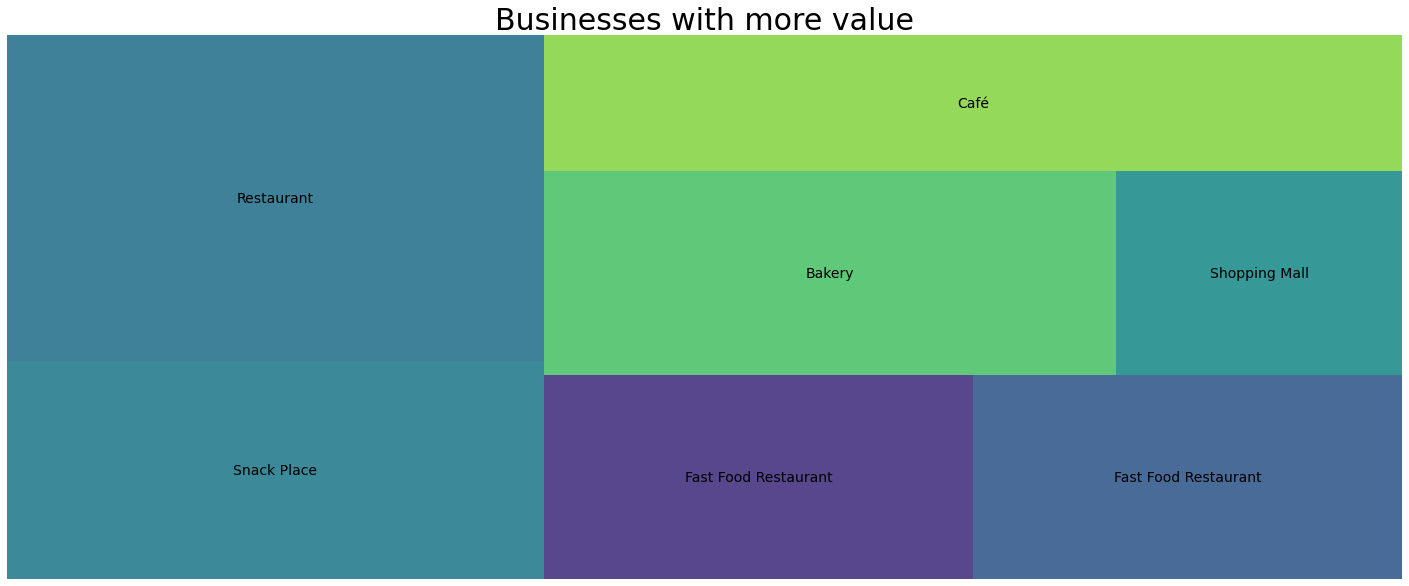

In [47]:
import squarify
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 10))
squarify.plot(sizes = final['value'], alpha = 0.9,
              label = final['business'], text_kwargs={'fontsize':14})

plt.title('Businesses with more value', fontsize = 30)
plt.axis('off')
plt.show()

## 2nd Method
### K Mean cluster

In [48]:
df = pd.read_csv('business_data.csv')
X = df.drop('venue_id',1).drop('venue_latitude',1).drop('venue_longitude',1)
X

,venue_name,venue_distance_from_location,category,venue_rate,venue_likes
0,The Refreshment Centre,8890,Snack Place,6.9,23.0
1,KC Grill,3032,Restaurant,6.3,5.0
2,OPTP Bahria Town,3049,Fast Food Restaurant,6.3,15.0
3,Peppercorn Grill,7530,Restaurant,6.7,4.0
4,Rasheed Sweets,7604,Bakery,6.6,8.0
...,...,...,...,...,...
69,Lutfs Cash & Carry,743,Department Store,NaN,NaN
70,Al-noor chemist,841,Pharmacy,NaN,NaN
71,Junaid Jamshed,984,Clothing Store,NaN,NaN
72,Baoo Gee Murg Pulao PWD,1191,Halal Restaurant,NaN,NaN


In [49]:
X = pd.get_dummies(X)

In [50]:
from sklearn.preprocessing import StandardScaler

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[ 2.25823312,  1.75636673,  2.76587199, ..., -0.11704115,
        -0.16666667, -0.11704115],
       [ 0.16439919,  1.56281328,  0.14929423, ..., -0.11704115,
        -0.16666667, -0.11704115],
       [ 0.17047552,  1.56281328,  1.60294854, ..., -0.11704115,
        -0.16666667, -0.11704115],
       ...,
       [-0.5676206 , -0.46949788, -0.57753293, ..., -0.11704115,
        -0.16666667, -0.11704115],
       [-0.49363227, -0.46949788, -0.57753293, ..., -0.11704115,
        -0.16666667, -0.11704115],
       [-0.59585769, -0.46949788, -0.57753293, ..., -0.11704115,
        -0.16666667, -0.11704115]])

In [51]:
from sklearn.cluster import KMeans

kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
df = pd.read_csv('business_data.csv')
df['label'] = kmeans.labels_

In [53]:
df.groupby('label').count()

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes
label,,,,,,,,
0,1,1,1,1,1,1,1,1
1,21,21,21,21,21,21,21,21
2,3,3,3,3,3,3,1,1
3,1,1,1,1,1,1,1,1
4,48,48,48,48,48,48,26,26


In [54]:
_map = folium.Map(location=[latitude, longitude], zoom_start=10)

colors = ['blue','red','green','yellow','purple']
for _label, name, lat, lng, distance in zip(df['label'], df['venue_name'], df['venue_latitude'], df['venue_longitude'], df['venue_distance_from_location']):
    label = '{}...{} {}m'.format(_label, name,distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[_label],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(_map)  
    
_map

In [55]:
df[df['label']==0]

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,label
4,53e783b4498e3e1c6aeff5a8,Rasheed Sweets,7604,33.520342,73.08925,Bakery,6.6,8.0,0


In [57]:
df[df['label']==2]

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,label
34,554c7509498e6819b46eab8b,Afsheen Mall PWD,682,33.571366,73.143636,Clothing Store,-1.0,0.0,2
51,567eb953498ec26fa3af01f8,Levis Factory Outlet,926,33.573092,73.147606,Clothing Store,NaN,NaN,2
71,5c5e9c1289b06a0039e5a073,Junaid Jamshed,984,33.573342,73.148325,Clothing Store,NaN,NaN,2


In [58]:
df[df['label']==1]['category'].unique()

array(['Snack Place', 'Restaurant', 'Fast Food Restaurant',
       'Shopping Mall', 'Café', 'Golf Course', 'Plaza', 'Hotel', 'Garden',
       'Market', 'Asian Restaurant', 'Pizza Place', 'Department Store',
       'Flea Market'], dtype=object)

In [61]:
df[df['label']==2]['category'].unique()

array(['Clothing Store'], dtype=object)

In [62]:
df[df['label']==4]['category'].unique()

array(['Travel & Transport', 'Convenience Store', 'Housing Development',
       'Asian Restaurant', 'Professional & Other Places', 'Bookstore',
       'Smoke Shop', 'Theme Restaurant', 'Mosque', 'Gourmet Shop',
       'BBQ Joint', 'Event Space', 'Butcher', 'Chinese Restaurant',
       'Video Store', 'Department Store', 'Auto Dealership', 'Pharmacy',
       'Bank', 'Pakistani Restaurant', 'Pizza Place', 'Optical Shop',
       'Gift Shop', 'Accessories Store', 'Miscellaneous Shop', 'Boutique',
       'Wedding Hall', 'Candy Store', 'Grocery Store', 'Automotive Shop',
       'Halal Restaurant'], dtype=object)

### There is less data in group 0 and 3, so we will only focus on Group 1, 2  and 4

In [63]:
#group0 = set(df[df['label']==0]['category'].unique())
group1 = set(df[df['label']==1]['category'].unique())
group2 = set(df[df['label']==2]['category'].unique())
#group3 = set(df[df['label']==3]['category'].unique())
group4 = set(df[df['label']==4]['category'].unique())

In [64]:
# Businesses that we can start in Group 2 Area
list(group1 - group2)

['Restaurant',
 'Fast Food Restaurant',
 'Asian Restaurant',
 'Snack Place',
 'Hotel',
 'Pizza Place',
 'Department Store',
 'Shopping Mall',
 'Golf Course',
 'Garden',
 'Market',
 'Plaza',
 'Café',
 'Flea Market']

In [65]:
venue_latitude ,venue_longitude = df[(df['label']==2)].mean().to_frame().transpose().loc[0,['venue_latitude','venue_longitude']]
venue_latitude ,venue_longitude

(33.57259997390955, 73.14652230097522)

In [66]:
ll = list(group1 - group2)
_label = ''
for l in ll:
    _label += l + '\n'
_label

'Restaurant\nFast Food Restaurant\nAsian Restaurant\nSnack Place\nHotel\nPizza Place\nDepartment Store\nShopping Mall\nGolf Course\nGarden\nMarket\nPlaza\nCafé\nFlea Market\n'

In [67]:
_map = folium.Map(location=[venue_latitude, venue_longitude], zoom_start=10)



label = folium.Popup(_label, parse_html=True)
folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(_map)  
    
_map